<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/trigmag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Propagation of error for trigonometric levelling

$\Delta h = SD_1 * cos(z_1) - SD_0 * cos(z_0)$

$ \frac {\partial {\Delta h}} {\partial {SD_1}} = cos(z_1)$

$ \frac {\partial {\Delta h}} {\partial {z_1}} = -SD_1 * sin(z_1)$

$ \frac {\partial {\Delta h}} {\partial {SD_0}} = -cos(z_0)$

$ \frac {\partial {\Delta h}} {\partial {z_0}} = SD_0 * sin(z_0)$


$m_{\Delta h} = \sqrt{cos(z_1)^2 * m_{SD_1}^2 + SD_1^2 * sin(z_1)^2 * \frac {m_z^2} {\rho^2} + cos(z_0)^2 * m_{SD_0}^2 + SD_0^2 * sin(z_0)^2 * \frac {m_z^2} {\rho^2} } $

In [4]:
from math import sqrt, sin ,cos, pi
from matplotlib import pyplot as plt

In [8]:
SD0 = SD1 = 100 # slope distance metres
z0 = z1 = 80 / 180 * pi   # zenith angle degree
mz = 1          # mean error for zenith angle seconds
mDZ = 0.001     # mean error for slope distance metres
rho = 180 * 60 * 60 / pi
mdh = sqrt(cos(z1)**2 * mDZ**2 + SD1**2 * sin(z1)**2 * (mz / rho)**2 +
           cos(z0)**2 * mDZ**2 + SD0**2 * sin(z0)**2 * (mz / rho)**2)
print(f"{mdh*1000:.1f} mm")

0.7 mm


Supposing SD1 = SD0 and z1 = z0


In [12]:
dist = range(20, 201, 20)
mdh = []
z = 80 / 180 * pi
for SD in dist:
    mdh.append(sqrt(2 * cos(z)**2 * mDZ**2 + SD**2 * sin(z)**2 * (mz / rho)**2) * 1000)
print([f"{m:.1f} " for m in mdh])

['0.3 ', '0.3 ', '0.4 ', '0.5 ', '0.5 ', '0.6 ', '0.7 ', '0.8 ', '0.9 ', '1.0 ']


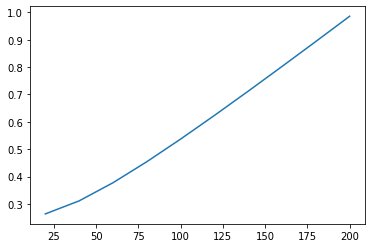

In [14]:
plt.plot(dist, mdh)